### 读取时间序列TIF | Read time-series TIF files

In [ ]:
import os
import random
from glob import glob
from osgeo import gdal
import numpy as np
from tqdm import tqdm
from datetime import datetime


def imread(tif_file):
    return gdal.Open(tif_file).ReadAsArray()

site = "Germany"
main_folder = "../dataset/dataset_down_from_GEE/"
hdf_folder = "../dataset/dataset_for_model/"

In [2]:
tif_list = glob(main_folder + site + '/S2_remove_cloud/*.tif')
s2_array = []
cloud_mask_array = []
date_list = []

no_cloud_percents = []
valiad_num = 0
non_valiad_num = 0
for tif in tqdm(tif_list):
    s2 = imread(tif)
    s2_array.append(s2)

    date = os.path.basename(tif).split('_')[-1]
    date_list.append(date.split(".")[0])
    
    cloud_mask_temp = s2[0, :, :] != 0 # 0 is missing, 1 is valid
    cloud_mask_temp = np.repeat(cloud_mask_temp[np.newaxis, :, :], 10, axis=0)
    cloud_mask_array.append(cloud_mask_temp.astype(np.uint8))
    
    valiad_num_temp = np.sum(s2[0, :, :] != 0)
    valiad_num += valiad_num_temp
    no_cloud_percents.append(valiad_num_temp / (s2.shape[1]*s2.shape[2]))
    non_valiad_num += np.sum(s2[0, :, :] == 0)
    
s2_array = np.stack(s2_array)    
t, b, h, w = s2_array.shape
s2_array = s2_array.reshape(t, b, -1)

cloud_mask_array = np.stack(cloud_mask_array)
cloud_mask_array = cloud_mask_array.reshape(t, b, -1) # 0 is missing, 1 is valid

100%|██████████| 54/54 [00:13<00:00,  3.88it/s]


In [ ]:
valiad_num_for_series = valiad_num / (t*h*w)
print("整个序列的有效像素占比 | Percentage of clear pixels in the entire sequence:{}".format(valiad_num_for_series))

def int_to_doy(date_int):
    date_str = str(date_int)
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])     
    date_obj = datetime(year, month, day)  
    doy = date_obj.timetuple().tm_yday
    return doy

doy_list = np.asarray([int_to_doy(d) for d in date_list])
print("保留影像的年积日 | DOYs in Preserved Images:\n{}".format(doy_list))

整个序列的有效像素占比:0.688164618690393
保留影像的年积日:
[ 39  47  49  59  64  79  82  89  92  94  97  99 107 109 112 114 127 132
 137 144 149 152 154 157 159 162 169 174 177 182 192 199 202 204 207 209
 222 234 237 239 244 247 249 254 257 259 262 264 269 279 287 339 344 354]


### 候选云mask （用于人工模拟不同比例缺失）| Candidate Cloud Mask (Used for artificially simulating different levels of missing data)

In [3]:
candidate_cloud_mask40 = [
    "S2_Cloud_probability_20230819",
    "S2_Cloud_probability_20231107",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20210322",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_probability_20240306",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20220901",
    "S2_Cloud_probability_20210302",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20201011",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_Probability_20230404",
    "S2_Cloud_Probability_20230225",  
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20210517",
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20230819",
    "S2_Cloud_probability_20231107",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20200909",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_Probability_20230201",
    "S2_Cloud_probability_20221102",
    
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_probability_20220116", 
    "S2_Cloud_probability_20200909",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_Probability_20230201",
    "S2_Cloud_probability_20221102",
    
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20241219",
]
cloud_percents = 0
cloud_percent_perimg = []
for cloud_mask in candidate_cloud_mask40:
    path_temp = os.path.join(main_folder, site, "cand_cloud_mask/cloud_mask", cloud_mask + ".tif")
    s2 = imread(path_temp)
    cloud_percent = np.sum(s2) / (t*h*w)
    cloud_percent_perimg.append(cloud_percent)
    cloud_percents += np.sum(s2)
cloud_percents_sum = cloud_percents / (t*h*w)
print("候选云mask40的云比例:{}".format(cloud_percent_perimg))
print("候选云mask40的云总比例:{}\n".format(cloud_percents_sum))


candidate_cloud_mask60 = [
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20210322",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_probability_20241126",
    "S2_Cloud_probability_20240612",
    "S2_Cloud_probability_20240306",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20210302",
    "S2_Cloud_probability_20201011",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_Probability_20230822",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_Probability_20230404",
    "S2_Cloud_Probability_20230225",  
    "S2_Cloud_probability_20210517",
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20200909",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_Probability_20230201",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20200327",
    "S2_Cloud_probability_20200404",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20210322",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_probability_20241126",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20240612",
    "S2_Cloud_probability_20240306",
    "S2_Cloud_probability_20220901",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20200404",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_probability_20220116", 
    "S2_Cloud_probability_20200909",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_Probability_20230201",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_Probability_20230404", #  
    "S2_Cloud_probability_20210322", 
    "S2_Cloud_Probability_20230404",
    "S2_Cloud_probability_20201011",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_probability_202411262", 
]
cloud_percents = 0
for cloud_mask in candidate_cloud_mask60:
    path_temp = os.path.join(main_folder, site, "cand_cloud_mask/cloud_mask", cloud_mask + ".tif")
    s2 = imread(path_temp)
    cloud_percent = np.sum(s2) / (t*h*w)
    cloud_percent_perimg.append(cloud_percent)
    cloud_percents += np.sum(s2)
cloud_percents_sum = cloud_percents / (t*h*w)
print("候选云mask60的云比例:{}".format(cloud_percent_perimg))
print("候选云mask60的云总比例:{}\n".format(cloud_percents_sum))


candidate_cloud_mask80 = [
    "S2_Cloud_probability_20200404",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20210322",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_probability_20241126",
    "S2_Cloud_probability_20240612",
    "S2_Cloud_probability_20240306", 
    "S2_Cloud_probability_20200404",  
    "S2_Cloud_probability_20210302", 
    "S2_Cloud_probability_20200406",  
    "S2_Cloud_probability_20200531",
    "S2_Cloud_probability_20220928", 
    "S2_Cloud_probability_20211212",  
    "S2_Cloud_Probability_20230404",
    "S2_Cloud_probability_20210126",  
    "S2_Cloud_probability_202411262", 
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20241219",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_probability_20200531",
    "S2_Cloud_probability_20200404",
    "S2_Cloud_probability_20201016",
    "S2_Cloud_probability_20210322",
    "S2_Cloud_probability_20220916",
    "S2_Cloud_probability_20241126",
    "S2_Cloud_probability_20240612",
    "S2_Cloud_probability_20240306", 
    "S2_Cloud_probability_20220901",  
    "S2_Cloud_probability_20210302",  
    "S2_Cloud_probability_20220116", 
    "S2_Cloud_probability_20241219", # 
    "S2_Cloud_probability_20220215",  
    "S2_Cloud_probability_20200531",  
    "S2_Cloud_Probability_20230404", #  
    "S2_Cloud_probability_20210322", 
    "S2_Cloud_Probability_20230404",
    "S2_Cloud_probability_20220621",
    "S2_Cloud_probability_20200404",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_probability_20220116", 
    "S2_Cloud_probability_20210126",
    "S2_Cloud_probability_20210302",
    "S2_Cloud_probability_20201011",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_Probability_20230822",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_probability_20200909",
    "S2_Cloud_Probability_20230701",
    "S2_Cloud_Probability_20230201",
    "S2_Cloud_probability_20221102",
    "S2_Cloud_probability_20201011",
    "S2_Cloud_Probability_20231021",
    "S2_Cloud_Probability_20230514",
    "S2_Cloud_Probability_20230404",
]
cloud_percents = 0
cloud_percent_perimg = []
for cloud_mask in candidate_cloud_mask80:
    path_temp = os.path.join(main_folder, site, "cand_cloud_mask/cloud_mask", cloud_mask + ".tif")
    s2 = imread(path_temp)
    cloud_percent = np.sum(s2) / (t*h*w)
    cloud_percent_perimg.append(cloud_percent)
    cloud_percents += np.sum(s2)
cloud_percents_sum = cloud_percents / (t*h*w)
print("候选云mask80的云比例:{}".format(cloud_percent_perimg))
print("候选云mask80的云总比例:{}\n".format(cloud_percents_sum))

sorted_indices = np.argsort(cloud_percent_perimg)
# 根据大小排序索引打印 candidate_cloud_mask80 中的元素
# for idx in sorted_indices:
#     print(candidate_cloud_mask0[idx], cloud_percent_perimg[idx])

候选云mask40的云比例:[0.004187410809289805, 0.004552093128396468, 0.012579822135832098, 0.014104603231505527, 0.004206751268559053, 0.014035723907801195, 0.013185771136167075, 0.004206751268559053, 0.013716388513381502, 0.011632443752757947, 0.004206751268559053, 0.013728693089465676, 0.009021161191311139, 0.006497761413760119, 0.00926876509909984, 0.006149666024872472, 0.004206751268559053, 0.006219416614485236, 0.012150625042052964, 0.004187410809289805, 0.004552093128396468, 0.004206751268559053, 0.007373835723667792, 0.010646450207062919, 0.009175309501185966, 0.004206751268559053, 0.010646450207062919, 0.014896649698187736, 0.007373835723667792, 0.010646450207062919, 0.009175309501185966, 0.004206751268559053, 0.004206751268559053, 0.012579822135832098, 0.012150625042052964, 0.01569687455712362]
候选云mask40的云总比例:0.31378547168043047

候选云mask60的云比例:[0.004187410809289805, 0.004552093128396468, 0.012579822135832098, 0.014104603231505527, 0.004206751268559053, 0.014035723907801195, 0.0131857711

### 写出HDF数据 | extract them into HDF format

In [6]:
import h5py

hdf_save_path = os.path.join(hdf_folder, site, "hdf", "random_missing.hdf")
with h5py.File(hdf_save_path, "w") as hf:
    X_set = hf.create_group("data")
    X_set.create_dataset("X", data = s2_array.astype(np.uint16).transpose(2, 0, 1), compression='gzip', compression_opts=9)  # timelen, featuresnum, sample number → sample number, timelen, feature_num
    X_set.create_dataset("date", data = doy_list.astype(np.uint16), compression='gzip', compression_opts=9)
    
    mask_set = hf.create_group("mask")

### 为时间序列影像应用不同比例的云mask以模拟不同比例的缺失 | Apply cloud masks of varying proportions to time-series imagery to simulate different levels of data missing.

In [7]:
# 通过为序列中剩余单景清晰像素影像应用云掩膜, 模拟不同比率的云覆盖
random.seed(66)
np.random.seed(66)
novalid_percents = ["40%", "60%", "80%"]
candidate_cloud_masks = [candidate_cloud_mask40, candidate_cloud_mask60, candidate_cloud_mask80]

for cloud_mask_artifical, flag in zip(candidate_cloud_masks, novalid_percents):
    cover_img_idx = np.random.choice(
        [i for i in range(t)],
        len(cloud_mask_artifical), 
        # p = no_cloud_percents / np.sum(no_cloud_percents),
        replace=False
    )
    # 随机旋转的idx
    random_rots = random.choices([0, 1, 2, 3], k=len(cover_img_idx))

    # 将云mask覆盖到indicating_mask_temp
    cloud_idx_artifical = []
    for k, tif_name in zip(random_rots, cloud_mask_artifical):
        path_temp = os.path.join(main_folder, site, "cand_cloud_mask/cloud_mask", tif_name + ".tif")
        c = imread(path_temp) # 1 代表云
        c = np.rot90(c, k=k)
        c = np.repeat(c[np.newaxis, :, :], 10, axis=0)
        c = (c == 1).astype(np.uint8).reshape(10, -1) # 1 代表人工加的云
        cloud_idx_artifical.append(c)
    
    missing_mask_temp = cloud_mask_array.copy() # 1 表示有效观测
    indicating_mask_temp = np.zeros_like(s2_array) # 1 代表保留验证; 即等于人工添加云的像素     
    missing_percent = 0
    indicating_percent = 0
    i = 0
    for idx in range(t):
        if idx in cover_img_idx:
            indicating_mask_temp[idx, :, :] = cloud_idx_artifical[i] & (missing_mask_temp[idx, :, :] == 1).astype(np.uint8) # 保留验证像素：人工加云且原始观测值有效
            missing_mask_temp[idx, :, :] = (missing_mask_temp[idx, :, :] != 0) & (indicating_mask_temp[idx, :, :] != 1) # 计算重建loss的像素：原始不为云并且未人工添加云==1 代表有效值
            i += 1
            
        missing_percent += np.sum(missing_mask_temp[idx, :, :])
        indicating_percent += np.sum(indicating_mask_temp[idx, :, :]) 
    
    missing_percent = missing_percent / (t*b*h*w)
    indicating_percent = indicating_percent / (t*b*h*w)
    print("{}缺失情况下缺失占比, {}".format(flag, 100-missing_percent*100))
    print("{}缺失情况下保留验证像素占比, {}".format(flag, indicating_percent*100))
        
    # 写出hdf5数据 
    with h5py.File(hdf_save_path, "a") as hf:
        mask_set = hf.require_group("mask")
        mask_set.create_dataset("missing_mask_" + flag, data=missing_mask_temp.astype(np.uint8).transpose(2, 0, 1), compression='gzip', compression_opts=9)
        mask_set.create_dataset("indicating_mask_" + flag, data=indicating_mask_temp.astype(np.uint8).transpose(2, 0, 1), compression='gzip', compression_opts=9)

40%缺失情况下缺失占比, 54.630498018716665
40%缺失情况下保留验证像素占比, 23.446959887755963
60%缺失情况下缺失占比, 67.7716143112297
60%缺失情况下保留验证像素占比, 36.58807470076085
80%缺失情况下缺失占比, 78.47705004224242
80%缺失情况下保留验证像素占比, 47.29351174689192


### 提取SAR时间序列为HDF | Extract SAR time series into HDF

In [ ]:
import os
from glob import glob
from osgeo import gdal # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore
from datetime import datetime
import h5py # type: ignore


def imread(tif_file):
    return gdal.Open(tif_file).ReadAsArray()

S1_folder = os.path.join(main_folder, site, "S1_raw")

In [ ]:
def int_to_doy(date_int):
    date_str = str(date_int)
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])     
    date_obj = datetime(year, month, day)  
    doy = date_obj.timetuple().tm_yday
    return doy


tif_list = glob(S1_folder + '/*.tif')
s1_array = []
date_list = []
for tif in tqdm(tif_list):
    s1 = imread(tif)
    valiad_percent = np.sum(~np.isnan(s1[0, :, :])) / 1501**2
    if valiad_percent > 0.9:
        # print(os.path.basename(tif), valiad_percent)
        s1_array.append(s1)
        
        date = os.path.basename(tif).split('_')[-1]
        date_list.append(date.split(".")[0])

s1_array = np.stack(s1_array)    
t, b, h, w = s1_array.shape
s1_array = s1_array.reshape(t, b, -1)

date_list = np.asarray([int_to_doy(d) for d in date_list])
print("有效SAR影像的年积日:\n{}".format(date_list))

100%|██████████| 120/120 [00:07<00:00, 16.54it/s]


有效SAR影像的年积日:
[  1   6   7  12  13  18  19  24  25  30  31  36  37  42  43  48  49  54
  55  60  61  66  67  72  73  78  79  84  85  90  91  96  97 102 103 109
 114 115 120 121 126 127 132 133 138 139 144 145 150 151 156 157 162 163
 168 169 174 175 180 181 186 187 192 193 198 199 204 205 210 211 216 217
 222 223 228 229 234 235 240 241 246 247 252 253 258 259 264 265 270 271
 276 277 282 283 288 289 294 295 300 301 306 307 312 313 318 319 324 325
 330 331 336 337 342 343 348 349 354 355 360 361]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s1_array_ = s1_array.transpose(1, 0, 2).reshape(2, -1).transpose(1, 0)

s1_array_[np.isnan(s1_array_)] = np.nanmean(s1_array_)
scaler.fit(s1_array_)

mean = scaler.mean_
std = scaler.scale_
print(mean)
print(std)

[-10.58998404 -17.8438248 ]
[3.18391555 4.17189133]


In [11]:
with h5py.File(hdf_save_path, "a") as hf:
    group = hf.require_group('data')
    
    group.create_dataset("X_aux", data = s1_array.astype(np.float32).transpose(2, 0, 1), compression='gzip', compression_opts=9)
    group.create_dataset("date_aux", data = date_list.astype(np.uint16), compression='gzip', compression_opts=9)
    
    group.create_dataset("X_aux_mean", data = mean.astype(np.float32), compression='gzip', compression_opts=9)
    group.create_dataset("X_aux_std", data = std.astype(np.float32), compression='gzip', compression_opts=9)

### 验证HDF数据并写入均值标准差 | Verify HDF data and write mean and Standard Deviation

In [12]:
'''
data
    - X
    - date
    - X_aux
    - date_aux
    - X_aux_mean
    - X_aux_std
mask
    - missing_mask_80%
    - indicating_mask_80%
    - missing_mask_40%
    - indicating_mask_40%
    - missing_mask_40%
    - indicating_mask_40%    
'''
import h5py # type: ignore

with h5py.File(hdf_save_path, "r") as hf:
    missing_mask_40 = hf["mask"]["missing_mask_40%"][:]
    missing_mask_60 = hf["mask"]["missing_mask_60%"][:]
    missing_mask_80 = hf["mask"]["missing_mask_80%"][:]
    
    m40 = np.sum(missing_mask_40) / missing_mask_40.size
    m60 = np.sum(missing_mask_60) / missing_mask_60.size
    m80 = np.sum(missing_mask_80) / missing_mask_80.size
    print("有效占比{}, {}, {}".format(m40, m60, m80))
    
    indicating_mask_40 = hf["mask"]["indicating_mask_40%"][:]
    indicating_mask_60 = hf["mask"]["indicating_mask_60%"][:]
    indicating_mask_80 = hf["mask"]["indicating_mask_80%"][:]
    
    i40 = np.sum(indicating_mask_40) / indicating_mask_40.size
    i60 = np.sum(indicating_mask_60) / indicating_mask_60.size
    i80 = np.sum(indicating_mask_80) / indicating_mask_80.size
    
    print("保留验证像素占比{}, {}, {}".format(i40, i60, i80))

有效占比0.45369501981283333, 0.32228385688770306, 0.21522949957757576
保留验证像素占比0.23446959887755964, 0.3658807618026899, 0.4729351191128172


In [13]:
def cal_mean_std(X, mask):
    X = X.astype(np.float64) / 10000
    X[mask==0] = np.nan
    
    from einops import rearrange # type: ignore
    X = rearrange(X, "n t b -> b (n t)")
    X = rearrange(X, "b nt -> nt b")
    X_mean = np.nanmean(X, axis=0) 
    X_std = np.nanstd(X, axis=0)
    return X_mean[np.newaxis, :], X_std[np.newaxis, :]


with h5py.File(hdf_save_path, "a") as hf:
    X = hf["data"]["X"][:]
    group = hf.require_group('data')
    
    X_mean_40, X_std_40 = cal_mean_std(X, missing_mask_40)
    X_mean_60, X_std_60 = cal_mean_std(X, missing_mask_60)
    X_mean_80, X_std_80 = cal_mean_std(X, missing_mask_80)
    
    group.create_dataset("X_mean_40%", data = X_mean_40.astype(np.float32))
    group.create_dataset("X_std_40%", data = X_std_40.astype(np.float32))

    group.create_dataset("X_mean_60%", data = X_mean_60.astype(np.float32))
    group.create_dataset("X_std_60%", data = X_std_60.astype(np.float32))

    group.create_dataset("X_mean_80%", data = X_mean_80.astype(np.float32))
    group.create_dataset("X_std_80%", data = X_std_80.astype(np.float32))
    
    print("mean, std of 40%: {X_mean_40} {X_std_40} \nmean, std of 60%: {X_mean_60} {X_std_60} \nmean, std of 80%: {X_mean_80} {X_std_80}".format(
        X_mean_40=X_mean_40, 
        X_std_40=X_std_40, 
        X_mean_60=X_mean_60, 
        X_std_60=X_std_60, 
        X_mean_80=X_mean_80, 
        X_std_80=X_std_80
    ))

mean, std of 40%: [[0.0560931  0.07820754 0.07826688 0.12199164 0.23053791 0.2700585
  0.28694908 0.29348802 0.21045375 0.14608424]] [[0.0294467  0.03634312 0.05420814 0.0537814  0.06922874 0.08621366
  0.090617   0.08737519 0.09233612 0.09572206]] 
mean, std of 60%: [[0.05543962 0.07819312 0.07875101 0.12202999 0.22755937 0.26521246
  0.28185265 0.28804035 0.21268148 0.14968172]] [[0.03118806 0.03743367 0.05506058 0.05420102 0.06920173 0.08540742
  0.08979236 0.08641381 0.09357598 0.09761053]] 
mean, std of 80%: [[0.0560182  0.0780105  0.0791579  0.12187475 0.22427556 0.26102865
  0.27736047 0.28395826 0.21134011 0.14857781]] [[0.03001141 0.0371597  0.05554666 0.05492436 0.06730488 0.08252216
  0.08641113 0.08367876 0.09544038 0.09847688]]


#### 验证写入的均值和标准差 | Verifying Mean and Standard Deviation

In [14]:
with h5py.File(hdf_save_path, "a") as hf:
    X_mean_40, X_std_40 = hf["data"]["X_mean_40%"][:], hf["data"]["X_std_40%"][:]
    X_mean_60, X_std_60 = hf["data"]["X_mean_60%"][:], hf["data"]["X_std_60%"][:]
    X_mean_80, X_std_80 = hf["data"]["X_mean_80%"][:], hf["data"]["X_std_80%"][:]
    
    print("mean, std of 40%: {X_mean_40} {X_std_40} \nmean, std of 60%: {X_mean_60} {X_std_60} \nmean, std of 80%: {X_mean_80} {X_std_80}".format(
        X_mean_40=X_mean_40, 
        X_std_40=X_std_40, 
        X_mean_60=X_mean_60, 
        X_std_60=X_std_60, 
        X_mean_80=X_mean_80, 
        X_std_80=X_std_80
    ))

mean, std of 40%: [[0.0560931  0.07820754 0.07826688 0.12199164 0.23053792 0.27005848
  0.28694907 0.29348803 0.21045375 0.14608423]] [[0.0294467  0.03634312 0.05420814 0.0537814  0.06922875 0.08621366
  0.090617   0.08737519 0.09233613 0.09572206]] 
mean, std of 60%: [[0.05543962 0.07819312 0.07875101 0.12202999 0.22755937 0.26521245
  0.28185263 0.28804037 0.21268147 0.14968173]] [[0.03118806 0.03743367 0.05506058 0.05420103 0.06920173 0.08540742
  0.08979236 0.08641381 0.09357598 0.09761053]] 
mean, std of 80%: [[0.0560182  0.0780105  0.0791579  0.12187475 0.22427556 0.26102865
  0.27736047 0.28395826 0.21134011 0.14857781]] [[0.03001141 0.0371597  0.05554666 0.05492437 0.06730488 0.08252215
  0.08641113 0.08367875 0.09544038 0.09847688]]


#### 40% missing plot

[1703330]


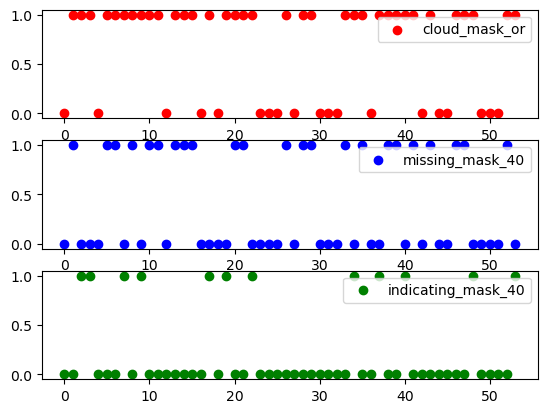

In [ ]:
import matplotlib.pyplot as plt
idx = random.sample(range(0, len(missing_mask_40)), 1)
print(idx)
t = missing_mask_40.shape[1]

cloud_mask_or = cloud_mask_array.transpose(2, 0, 1)[idx, :, 0]
missing_mask_40_ = missing_mask_40[idx, :, 0]
indicating_mask_40_ = indicating_mask_40[idx, :, 0]

fig, axs = plt.subplots(3)
axs[0].scatter(np.arange(t), cloud_mask_or, c='r', label='cloud_mask_or') # 1 表示有效观测
axs[1].scatter(np.arange(t), missing_mask_40_, c='b', label='missing_mask_40') # 1 表示有效观测
axs[2].scatter(np.arange(t), indicating_mask_40_, c='g', label='indicating_mask_40') # 1 表示保留验证
axs[0].legend()
axs[1].legend()
axs[2].legend()

#### 60% missing plot

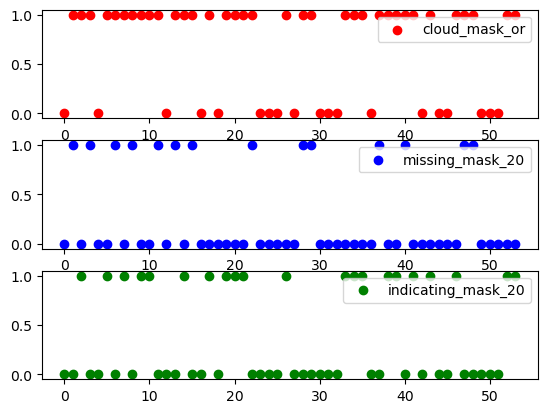

In [16]:
cloud_mask_or = cloud_mask_array.transpose(2, 0, 1)[idx, :, 0]
missing_mask_60_ = missing_mask_60[idx, :, 0]
indicating_mask_60_ = indicating_mask_60[idx, :, 0]

fig, axs = plt.subplots(3)
axs[0].scatter(np.arange(t), cloud_mask_or, c='r', label='cloud_mask_or')
axs[1].scatter(np.arange(t), missing_mask_60_, c='b', label='missing_mask_20')
axs[2].scatter(np.arange(t), indicating_mask_60_, c='g', label='indicating_mask_20')
axs[0].legend()
axs[1].legend()
axs[2].legend()

#### 80% missing plot

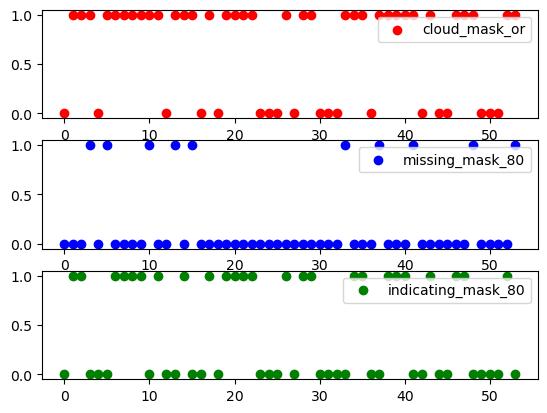

In [17]:
# idx = random.sample(range(0, len(missing_mask_40)), 1)

cloud_mask_or = cloud_mask_array.transpose(2, 0, 1)[idx, :, 0]
missing_mask_80_ = missing_mask_80[idx, :, 0]
indicating_mask_80_ = indicating_mask_80[idx, :, 0]

fig, axs = plt.subplots(3)
axs[0].scatter(np.arange(t), cloud_mask_or, c='r', label='cloud_mask_or')
axs[1].scatter(np.arange(t), missing_mask_80_, c='b', label='missing_mask_80') # 1 表示有效观测
axs[2].scatter(np.arange(t), indicating_mask_80_, c='g', label='indicating_mask_80')
axs[0].legend()
axs[1].legend()
axs[2].legend()

### 写出人工缺失的时间序列 | Write time-series images with artificial missing 

In [ ]:
import os
import h5py # type: ignore
from utils import *

import numpy as np  # type: ignore
from tqdm import tqdm  # type: ignore
import matplotlib.pyplot as plt  # type: ignore


site = "Germany"
hdf_folder = "../dataset/dataset_for_model/"
hdf_save_path = os.path.join(hdf_folder, site, "hdf", "random_missing.hdf")

# hdf5 path
tif_ouput_folder = os.path.join(hdf_folder, site, "tif")
ref_img_path = "../dataset/dataset_down_from_GEE/Germany/S2_remove_cloud/S2_L2A_20190208.tif"
b, h, w = imread(ref_img_path).shape
t = 54
year = 2019

if not os.path.exists(tif_ouput_folder):
    os.makedirs(tif_ouput_folder, exist_ok=True)

In [21]:
for ratio in ["40%", "60%", "80%"]:
    with h5py.File(hdf_save_path, "r") as hf:
        s2_array = hf["data"]["X"][:]
        dates = hf["data"]["date"][:]
        
        masks = hf["mask"]["indicating_mask_" + ratio][:]
        masks = (masks == 1).transpose(1, 2, 0).reshape(t, b, h, w)
        # convert to [t, b, h, w]
        s2_array = s2_array.transpose(1, 2, 0).reshape(t, b, h, w)
        s2_array[masks] = 0
        
        tif_ouput_folder_sub = os.path.join(tif_ouput_folder, str(ratio)) # type: ignore
        if not os.path.exists(tif_ouput_folder_sub):
            os.makedirs(tif_ouput_folder_sub, exist_ok=True)
        for i in tqdm(range(t)):
            s2_artifical_missing = s2_array[i, ...]
            ymd = "".join(doy_to_ymd(year, int(dates[i])).split("-")) # type: ignore
            
            s2_artifical_missing_path = os.path.join(tif_ouput_folder_sub, "S2_L2A_" + str(ymd) + ".tif") # type: ignore
            imsave(s2_artifical_missing, s2_artifical_missing_path, dtype="uint16", ref_img_path=ref_img_path) # type: ignore

100%|██████████| 54/54 [00:24<00:00,  2.18it/s]
